In [1]:
import numpy 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
from pywaffle import Waffle 
import matplotlib.patches as mpatches
from sklearn import metrics
import graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches
import plotly.express as px 
import statsmodels.api as sm
import scipy.stats as st 
import dtale 
import pandas_profiling as pdp
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn3, venn3_circles
import phik
import  datacleaner as dc
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

In [3]:
fd_ori=fd_dlvry.copy(deep=True)


In [4]:
fd_dlvry.head()

Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  ...  \
0              Post Graduate            4   12.9766    77.5993    560001  ...   
1                   Graduate            3   12.9770    77.5773    560009  ...   
2              Post Graduate            3   12.9551    77.6593    560017  ...   
3                   Graduate            6   12.9473    77.5616    560019  ...   
4              Post Graduate            4   12.9850    77.5533    560010  ...   

     Less Delivery time High Quality of package       Number of calls  \
0  Moderately Important    Moderately Important  Moderately Important   
1        Very Important          Very Important        Very Important   
2             Important          Very Important  Moderately Important   
3        Very Important               Important  Moderately Important   
4             Important               Important  Moderately Important   

             Politeness            Freshness            Temperature  \
0  Moderately Important  Moderately Important  Moderately Important   
1        Very Important        Very Important        Very Important   
2        Very Important        Very Important             Important   
3        Very Important        Very Important        Very Important   
4             Important             Important             Important   

            Good Taste          Good Quantity Output  \
0  Moderately Important  Moderately Important    Yes   
1        Very Important        Very Important    Yes   
2        Very Important  Moderately Important    Yes   
3        Very Important             Important    Yes   
4        Very Important        Very Important    Yes   

                                             Reviews  
0                                              Nil\n  
1                                                Nil  
2  Many a times payment gateways are an issue, so...  
3                                                nil  
4                                                NIL  

[5 rows x 55 columns]

In [5]:
fd_dlvry.shape

(388, 55)

In [6]:
fd_dlvry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [7]:
fd_dlvry.drop(['Output','Reviews'],axis=1,inplace=True)

In [8]:
df=pd.get_dummies(fd_dlvry)

In [9]:
df.head()

Age  Family size  latitude  longitude  Pin code  Gender_Female  \
0   20            4   12.9766    77.5993    560001              1   
1   24            3   12.9770    77.5773    560009              1   
2   22            3   12.9551    77.6593    560017              0   
3   22            6   12.9473    77.5616    560019              1   
4   22            4   12.9850    77.5533    560010              0   

   Gender_Male  Marital Status_Married  Marital Status_Prefer not to say  \
0            0                       0                                 0   
1            0                       0                                 0   
2            1                       0                                 0   
3            0                       0                                 0   
4            1                       0                                 0   

   Marital Status_Single  ...  Good Taste _Important  \
0                      1  ...                      0   
1                      1  ...                      0   
2                      1  ...                      0   
3                      1  ...                      0   
4                      1  ...                      0   

   Good Taste _Moderately Important  Good Taste _Slightly Important  \
0                                 1                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   Good Taste _Unimportant  Good Taste _Very Important  \
0                        0                           0   
1                        0                           1   
2                        0                           1   
3                        0                           1   
4                        0                           1   

   Good Quantity_Important  Good Quantity_Moderately Important  \
0                        0                                   1   
1                        0                                   0   
2                        0                                   1   
3                        1                                   0   
4                        0                                   0   

   Good Quantity_Slightly Important  Good Quantity_Unimportant  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          0   

   Good Quantity_Very Important  
0                             0  
1                             1  
2                             0  
3                             0  
4                             1  

[5 rows x 225 columns]

In [10]:
df.shape


(388, 225)

In [11]:
df.columns

Index(['Age', 'Family size', 'latitude', 'longitude', 'Pin code',
       'Gender_Female', 'Gender_Male', 'Marital Status_Married',
       'Marital Status_Prefer not to say', 'Marital Status_Single',
       ...
       'Good Taste _Important', 'Good Taste _Moderately Important',
       'Good Taste _Slightly Important', 'Good Taste _Unimportant',
       'Good Taste _Very Important', 'Good Quantity_Important',
       'Good Quantity_Moderately Important',
       'Good Quantity_Slightly Important', 'Good Quantity_Unimportant',
       'Good Quantity_Very Important'],
      dtype='object', length=225)

# Data Visulization

## PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)



In [13]:
principalComponents.shape

(388, 2)

In [14]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])


In [15]:
finalDf = pd.concat([principalDf, fd_ori['Output']] ,axis = 1) 

In [16]:
finalDf['Output']=finalDf['Output'].replace({'Yes':1,'No':0})


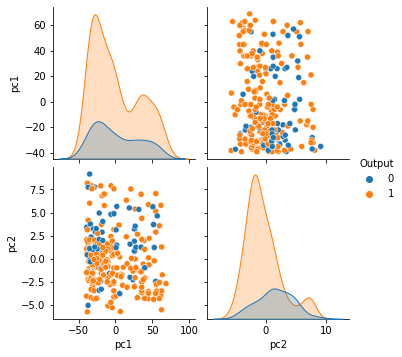

In [17]:
sns.pairplot( finalDf,hue='Output')

## LDA

In [18]:
from sklearn import svm


In [19]:
X=finalDf[['pc1','pc2']]
y=finalDf['Output']
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [20]:
clf=svm.SVC(C=10)

In [21]:
clf.fit(X_train,y_train)

SVC(C=10)

In [22]:
clf.score(X_test,y_test)

0.7628865979381443

In [23]:
clf.intercept_

array([1.11339915])

In [24]:
%matplotlib inline

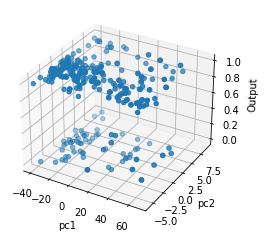

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

pc1 = X['pc1']
pc2= X['pc2']
out= y
ax.set_xlabel("pc1")
ax.set_ylabel("pc2")
ax.set_zlabel("Output")

ax.scatter(pc1, pc2, out)

In [26]:
m=dc.autoclean(fd_dlvry)

In [27]:
m

Age  Gender  Marital Status  Occupation  Monthly Income  \
0     20       0               2           3               4   
1     24       0               2           3               2   
2     22       1               2           3               2   
3     22       0               2           3               4   
4     22       1               2           3               2   
..   ...     ...             ...         ...             ...   
383   23       0               2           3               4   
384   23       0               2           3               4   
385   22       0               2           3               4   
386   23       1               2           3               2   
387   23       1               2           3               4   

     Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                             2            4   12.9766    77.5993    560001   
1                             0            3   12.9770    77.5773    560009   
2                             2            3   12.9551    77.6593    560017   
3                             0            6   12.9473    77.5616    560019   
4                             2            4   12.9850    77.5533    560010   
..                          ...          ...       ...        ...       ...   
383                           2            2   12.9766    77.5993    560001   
384                           2            4   12.9854    77.7081    560048   
385                           2            5   12.9850    77.5533    560010   
386                           2            2   12.9770    77.5773    560009   
387                           2            5   12.8988    77.5764    560078   

     ...  Delivery person ability  Influence of rating  Less Delivery time  \
0    ...                        2                    2                   1   
1    ...                        0                    2                   4   
2    ...                        0                    2                   0   
3    ...                        0                    2                   4   
4    ...                        0                    2                   0   
..   ...                      ...                  ...                 ...   
383  ...                        0                    0                   0   
384  ...                        1                    2                   1   
385  ...                        0                    2                   0   
386  ...                        3                    2                   0   
387  ...                        0                    0                   2   

     High Quality of package  Number of calls  Politeness  Freshness   \
0                          1                1           1           1   
1                          4                4           4           4   
2                          4                1           4           4   
3                          0                1           4           4   
4                          0                1           0           0   
..                       ...              ...         ...         ...   
383                        0                0           0           0   
384                        4                1           1           1   
385                        4                0           0           4   
386                        4                0           4           4   
387                        3                2           1           1   

     Temperature  Good Taste   Good Quantity  
0              1            1              1  
1              4            4              4  
2              0            4              1  
3              4            4              0  
4              0            4              4  
..           ...          ...            ...  
383            0            0              0  
384            1            4              4  
385            4            4              4  
386

In [28]:
data = pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

#Creating the Exploratory Data Analysis of our dataset
report = pdp.ProfileReport(data, title='Pandas Profiling Report')

In [29]:
# report.widgets

In [30]:
fd_ori.head()

Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  ...  \
0              Post Graduate            4   12.9766    77.5993    560001  ...   
1                   Graduate            3   12.9770    77.5773    560009  ...   
2              Post Graduate            3   12.9551    77.6593    560017  ...   
3                   Graduate            6   12.9473    77.5616    560019  ...   
4              Post Graduate            4   12.9850    77.5533    560010  ...   

     Less Delivery time High Quality of package       Number of calls  \
0  Moderately Important    Moderately Important  Moderately Important   
1        Very Important          Very Important        Very Important   
2             Important          Very Important  Moderately Important   
3        Very Important               Important  Moderately Important   
4             Important               Important  Moderately Important   

             Politeness            Freshness            Temperature  \
0  Moderately Important  Moderately Important  Moderately Important   
1        Very Important        Very Important        Very Important   
2        Very Important        Very Important             Important   
3        Very Important        Very Important        Very Important   
4             Important             Important             Important   

            Good Taste          Good Quantity Output  \
0  Moderately Important  Moderately Important    Yes   
1        Very Important        Very Important    Yes   
2        Very Important  Moderately Important    Yes   
3        Very Important             Important    Yes   
4        Very Important        Very Important    Yes   

                                             Reviews  
0                                              Nil\n  
1                                                Nil  
2  Many a times payment gateways are an issue, so...  
3                                                nil  
4                                                NIL  

[5 rows x 55 columns]

In [31]:
fd_ori.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [32]:
df=fd_ori.copy()

In [33]:


likely_cat = {}
for var in df.columns:
    likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.05

In [34]:
likely_cat

{'Age': True,
 'Gender': True,
 'Marital Status': True,
 'Occupation': True,
 'Monthly Income': True,
 'Educational Qualifications': True,
 'Family size': True,
 'latitude': False,
 'longitude': False,
 'Pin code': False,
 'Medium (P1)': True,
 'Medium (P2)': True,
 'Meal(P1)': True,
 'Meal(P2)': True,
 'Perference(P1)': True,
 'Perference(P2)': True,
 'Ease and convenient': True,
 'Time saving': True,
 'More restaurant choices': True,
 'Easy Payment option': True,
 'More Offers and Discount': True,
 'Good Food quality': True,
 'Good Tracking system': True,
 'Self Cooking': True,
 'Health Concern': True,
 'Late Delivery': True,
 'Poor Hygiene': True,
 'Bad past experience': True,
 'Unavailability': True,
 'Unaffordable': True,
 'Long delivery time': True,
 'Delay of delivery person getting assigned': True,
 'Delay of delivery person picking up food': True,
 'Wrong order delivered': True,
 'Missing item': True,
 'Order placed by mistake': True,
 'Influence of time': True,
 'Order Time':

<b> feature selection </b>

In [35]:
df1=pd.crosstab(fd_ori['Gender'],fd_ori['Occupation'])
df1.loc['total',:]=df1.sum(axis=0)
# df1.loc[:,'total']=df1.sum(axis=1)

In [36]:
df1

Occupation  Employee  House wife  Self Employeed  Student
Gender                                                   
Female          49.0         9.0            16.0     92.0
Male            69.0         0.0            38.0    115.0
total          118.0         9.0            54.0    207.0

In [37]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r_male=df1.loc['Male',:],
    r_female=df1.loc['Female',:],
    
    theta=list(df1.columns) ))
print(df)
fig = px.line_polar(df, r='r_female', theta='theta', line_close=True,title="Female-Male",labels={
                     "Male": " Male",
                     "Female": "Female)",
                     
                 })
fig1=px.line_polar(df, r='r_male', theta='theta', line_close=True,title="Male")
fig.add_trace(fig1.data[0])
fig.update_traces(fill='toself')
fig.show()


                r_male  r_female           theta
Occupation                                      
Employee          69.0      49.0        Employee
House wife         0.0       9.0      House wife
Self Employeed    38.0      16.0  Self Employeed
Student          115.0      92.0         Student


In [38]:
crv={}
l1=[]
for i in fd_ori.columns:
    if i not in  ['latitude','longitude','Pin code','Output','Reviews']:
        df=pd.crosstab(fd_ori['Output'],fd_ori[i])
        stat, p, dof, expected = st.chi2_contingency(df,correction=True)
        t=min(df.shape)-1
        deno=sum(df.sum())*t
        x=numpy.sqrt(stat / deno)
        if(x>0.3):
             l1.append((i,x))


crv['Output']=l1
        
crv
    
    

{'Output': [('Age', 0.41916612670006054),
  ('Ease and convenient', 0.6944483749782563),
  ('Time saving', 0.6333333550979008),
  ('More restaurant choices', 0.5897138785369491),
  ('Easy Payment option', 0.5571767618313485),
  ('More Offers and Discount', 0.5564505912203883),
  ('Good Food quality', 0.4243449172824401),
  ('Good Tracking system', 0.41749280981704445),
  ('Self Cooking', 0.3403727423216874),
  ('Health Concern', 0.3079956343776662),
  ('Late Delivery', 0.34652652235757503),
  ('Unaffordable', 0.40917014994986045),
  ('Maximum wait time', 0.4135981980209824)]}

In [39]:
basic_f0=[]
for i in l1:
    basic_f0.append(i[0])

basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Self Cooking',
 'Health Concern',
 'Late Delivery',
 'Unaffordable',
 'Maximum wait time']

<Figure size 1440x576 with 0 Axes>

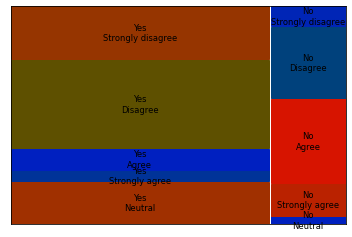

In [40]:
plt.figure(figsize=(20,8))
mosaic(fd_ori,['Output','Unaffordable'],statistic=True,axes_label=False)
plt.show()

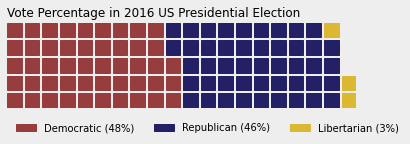

In [41]:
data = {'Democratic': 48, 'Republican': 46, 'Libertarian': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#983D3D", "#232066", "#DCB732"),
    title={'label': 'Vote Percentage in 2016 US Presidential Election', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()


In [42]:
%matplotlib inline

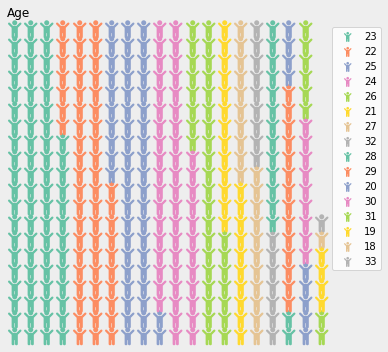

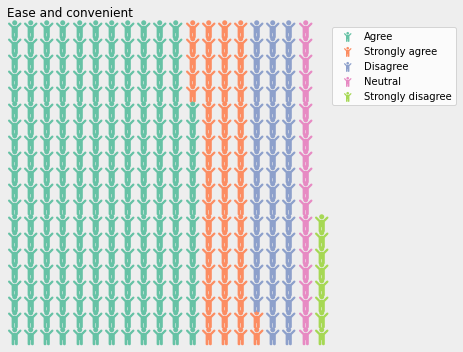

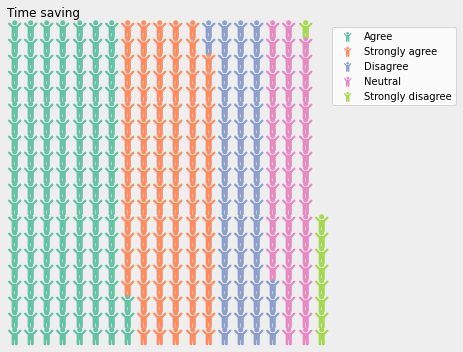

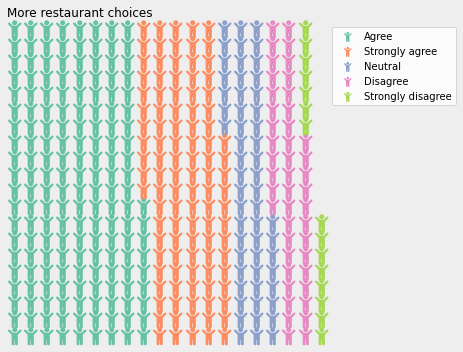

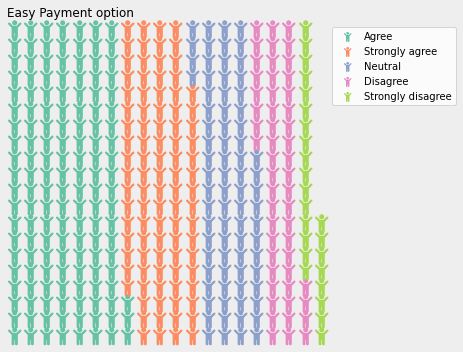

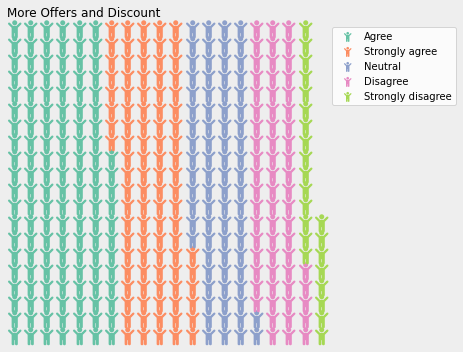

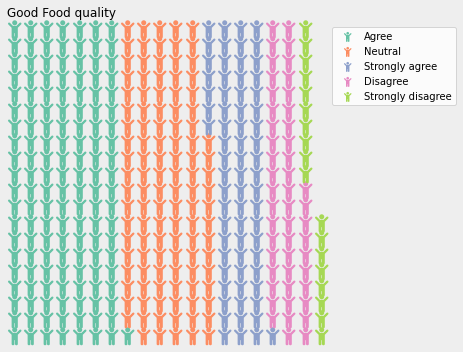

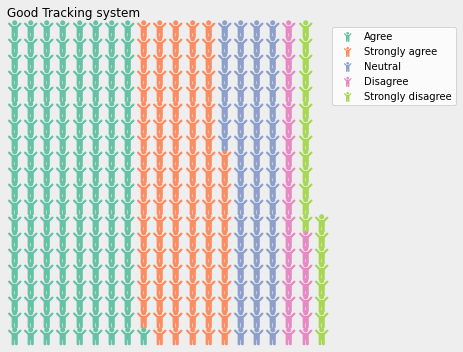

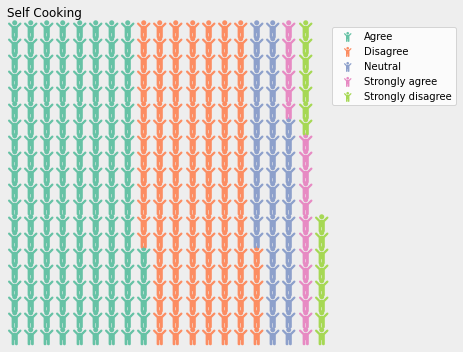

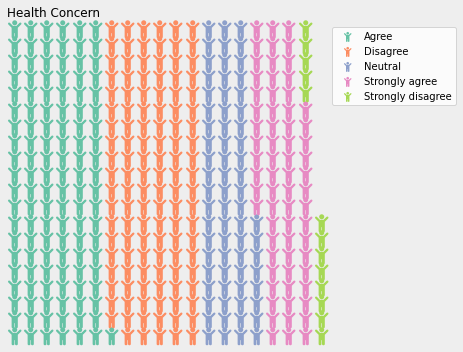

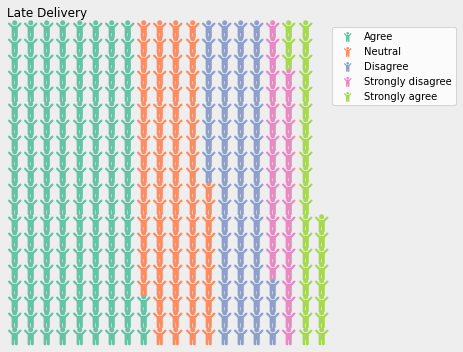

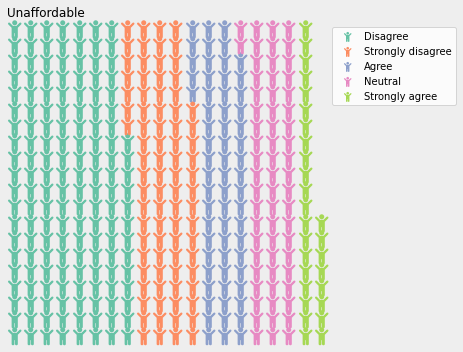

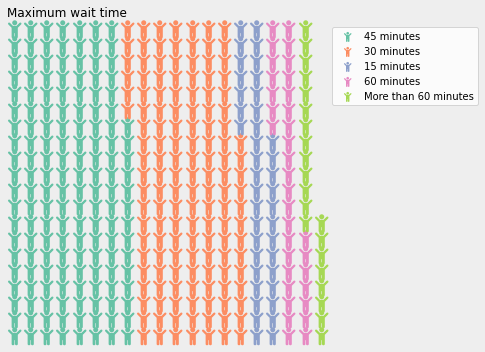

In [43]:
plt.figure(figsize=(10,8))
plt.close()
for i in basic_f0:
    fig = plt.figure(
        FigureClass=Waffle, 
        rows=20, 
        values=dict(fd_ori[i].value_counts()), 
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
        icons='child', 
        title={'label': i, 'loc': 'left'},
        icon_size=18, 
        icon_legend=True,
        figsize=(10,5)

    )
    fig.gca().set_facecolor('#EEEEEE')
    fig.set_facecolor('#EEEEEE')
    plt.show()

## Pandas report

In [44]:
fd_fa=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')
fd_fa=fd_fa.drop(["latitude","longitude","Reviews","Pin code"],axis=1)

In [45]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(fd_fa)
# prof.to_file(output_file='output.html')


In [46]:
import pandas as pd
import phik
from phik import resources, report
df = fd_fa.copy()
df.head()

# Pearson's correlation matrix between numeric variables (pandas functionality)
# df.corr()

# get the phi_k correlation matrix between all variables
print(type(df.phik_matrix()))
m=df.phik_matrix()

# get global correlations based on phi_k correlation matrix
# print(df.global_phik())

# get the significance matrix (expressed as one-sided Z)
# of the hypothesis test of each variable-pair dependency
# print(df.significance_matrix())

# # contingency table of two columns
# cols = ['mileage','car_size']
# df[cols].hist2d()

interval columns not set, guessing: ['Age', 'Family size']
<class 'pandas.core.frame.DataFrame'>
interval columns not set, guessing: ['Age', 'Family size']


In [47]:
m.style.apply(lambda x: ["background: red" if v>0.45 and v< 0.99 else "" for v in x], axis = 1)

In [48]:
l1=list(m.columns[(m['Output']>0.30) & (m['Output']<0.99)])

In [49]:
l1

['Age',
 'Occupation',
 'Perference(P2)',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Unaffordable',
 'Maximum wait time']

In [50]:
df1=m.loc[l1,l1]

In [51]:
df.head()

Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size         Medium (P1)   Medium (P2)  \
0              Post Graduate            4  Food delivery apps   Web browser   
1                   Graduate            3  Food delivery apps   Web browser   
2              Post Graduate            3  Food delivery apps   Direct call   
3                   Graduate            6  Food delivery apps       Walk-in   
4              Post Graduate            4             Walk-in   Direct call   

    Meal(P1)  ... Influence of rating    Less Delivery time  \
0  Breakfast  ...                 Yes  Moderately Important   
1     Snacks  ...                 Yes        Very Important   
2      Lunch  ...                 Yes             Important   
3     Snacks  ...                 Yes        Very Important   
4      Lunch  ...                 Yes             Important   

  High Quality of package       Number of calls            Politeness  \
0    Moderately Important  Moderately Important  Moderately Important   
1          Very Important        Very Important        Very Important   
2          Very Important  Moderately Important        Very Important   
3               Important  Moderately Important        Very Important   
4               Important  Moderately Important             Important   

             Freshness            Temperature           Good Taste   \
0  Moderately Important  Moderately Important  Moderately Important   
1        Very Important        Very Important        Very Important   
2        Very Important             Important        Very Important   
3        Very Important        Very Important        Very Important   
4             Important             Important        Very Important   

          Good Quantity Output  
0  Moderately Important    Yes  
1        Very Important    Yes  
2  Moderately Important    Yes  
3             Important    Yes  
4        Very Important    Yes  

[5 rows x 51 columns]

In [52]:
m.loc[l1,l1].style.apply(lambda x: ["background: red" if v>0.45 and v< 0.99 else "" for v in x], axis = 1)

<AxesSubplot:>

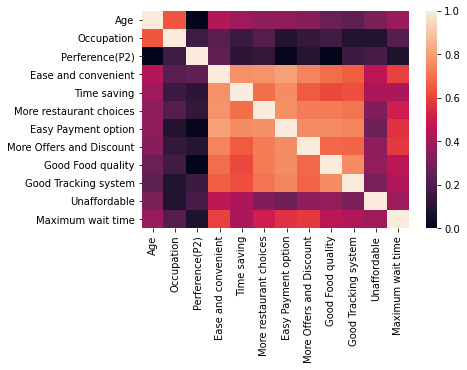

In [53]:
%matplotlib inline
sns.heatmap(df1,xticklabels=True, yticklabels=True,fmt="d")

In [54]:
fd_fa['Perference(P2)'].unique()

array([' Bakery items (snacks)',
       ' Veg foods (Breakfast / Lunch / Dinner)',
       ' Ice cream / Cool drinks', ' Sweets'], dtype=object)

## factor analysis


In [55]:
fd_fa=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')
fd_fa_ori=fd_fa.copy(deep=True)

In [56]:
fd_fa.head()

Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  ...  \
0              Post Graduate            4   12.9766    77.5993    560001  ...   
1                   Graduate            3   12.9770    77.5773    560009  ...   
2              Post Graduate            3   12.9551    77.6593    560017  ...   
3                   Graduate            6   12.9473    77.5616    560019  ...   
4              Post Graduate            4   12.9850    77.5533    560010  ...   

     Less Delivery time High Quality of package       Number of calls  \
0  Moderately Important    Moderately Important  Moderately Important   
1        Very Important          Very Important        Very Important   
2             Important          Very Important  Moderately Important   
3        Very Important               Important  Moderately Important   
4             Important               Important  Moderately Important   

             Politeness            Freshness            Temperature  \
0  Moderately Important  Moderately Important  Moderately Important   
1        Very Important        Very Important        Very Important   
2        Very Important        Very Important             Important   
3        Very Important        Very Important        Very Important   
4             Important             Important             Important   

            Good Taste          Good Quantity Output  \
0  Moderately Important  Moderately Important    Yes   
1        Very Important        Very Important    Yes   
2        Very Important  Moderately Important    Yes   
3        Very Important             Important    Yes   
4        Very Important        Very Important    Yes   

                                             Reviews  
0                                              Nil\n  
1                                                Nil  
2  Many a times payment gateways are an issue, so...  
3                                                nil  
4                                                NIL  

[5 rows x 55 columns]

In [57]:
fd_fa=fd_fa.drop(["latitude","longitude","Reviews","Output","Pin code"],axis=1)

In [58]:
fd_fa['Good Tracking system'].unique()

array(['Neutral', 'Agree', 'Strongly agree', 'Disagree',
       'Strongly disagree'], dtype=object)

In [59]:
for i in fd_fa.columns:
    try:
        if "Disagree" in list(fd_fa[i].unique()):
            fd_fa[i] = fd_fa[i].replace({'Strongly disagree': 1, 'Disagree': 2,
                                         'Neutral': 3, 'Agree': 4, 'Strongly agree': 5, 'Strongly Agree': 5})

        elif "Unimportant" in list(fd_fa[i].unique()):
            fd_fa[i] = fd_fa[i].replace({'Unimportant': 1, 'Slightly Important': 2,
                                         'Moderately Important': 3, 'Important': 4, 'Very Important': 5})
        elif "Student" in list(fd_fa[i].unique()):
            fd_fa[i] = fd_fa[i].replace({'Employee': 1, 'Self Employeed': 2,
                                         'House wife': 3, 'Student': 4})

        elif "Single" in list(fd_fa[i].unique()):
            fd_fa[i] = fd_fa[i].replace({'Single': 1, 'Prefer not to say': 0,
                                         'Married': 3})

    except:
            fd_fa[i] = fd_fa[i]

In [60]:
for i in fd_fa.columns:
    fd_fa[i] = fd_fa[i].replace({
                'No Income': 1, 'Below Rs.10000': 2,

                'More than 50000': 3, "10001 to 25000": 4,

                '25001 to 50000': 5, 'Uneducated': 1,

                'School': 2, 'Graduate': 3, 'Post Graduate': 4, 'Ph.D': 5,

                'Web browser': 2, 'Walk-in': 1, 'Direct call': 3, "Food delivery apps": 4,

                " Web browser": 2, ' Walk-in': 1, ' Direct call': 3,

                "Breakfast": 0, "Snacks": 1, "Lunch": 2, "Dinner": 3,
                 ' Lunch':1,' Snacks':2,' Dinner':3,

                "Veg foods (Breakfast / Lunch / Dinner)": 1,
                "Sweets": 2, "Bakery items (snacks)": 3, "Non Veg foods (Lunch / Dinner)": 4,

                ' Bakery items (snacks)': 1, ' Veg foods (Breakfast / Lunch / Dinner)': 2,

                ' Ice cream / Cool drinks': 3, ' Sweets': 4, "No": 0, "Yes": 2, "Maybe": 1,

                "Anytime (Mon-Sun)": 1, "Weekdays (Mon-Fri)": 2, "Weekend (Sat & Sun)": 3,
                '15 minutes': 1,

                "30 minutes": 2, "45 minutes": 3, '60 minutes': 4, 'More than 60 minutes': 5, 'Female': 0,
                'Male':1})

In [61]:
for i in fd_fa.columns:
    print(i,fd_fa[i].unique())

Age [20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
Gender [0 1]
Marital Status [1 3 0]
Occupation [4 1 2 3]
Monthly Income [1 2 3 4 5]
Educational Qualifications [4 3 5 1 2]
Family size [4 3 6 2 5 1]
Medium (P1) [4 1 3 2]
Medium (P2) [2 3 1]
Meal(P1) [0 1 2 3]
Meal(P2) [1 3 2]
Perference(P1) [4 1 3 2]
Perference(P2) [1 2 3 4]
Ease and convenient [3 5 4 1 2]
Time saving [3 5 4 2 1]
More restaurant choices [3 5 4 1 2]
Easy Payment option [3 5 4 2 1]
More Offers and Discount [3 5 4 2 1]
Good Food quality [3 2 4 5 1]
Good Tracking system [3 4 5 2 1]
Self Cooking [3 5 2 4 1]
Health Concern [3 5 4 1 2]
Late Delivery [3 4 5 2 1]
Poor Hygiene [3 5 4 2 1]
Bad past experience [3 5 4 2 1]
Unavailability [3 5 4 2 1]
Unaffordable [3 5 4 2 1]
Long delivery time [4 5 3 2 1]
Delay of delivery person getting assigned [4 5 2 3 1]
Delay of delivery person picking up food [4 5 3 2 1]
Wrong order delivered [4 5 2 3 1]
Missing item [4 5 2 3 1]
Order placed by mistake [4 5 3 2 1]
Influence of time [2 0 1]

In [62]:
fd_fa.info()
fd_fa_t=fd_fa.copy(deep=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Age                                        388 non-null    int64
 1   Gender                                     388 non-null    int64
 2   Marital Status                             388 non-null    int64
 3   Occupation                                 388 non-null    int64
 4   Monthly Income                             388 non-null    int64
 5   Educational Qualifications                 388 non-null    int64
 6   Family size                                388 non-null    int64
 7   Medium (P1)                                388 non-null    int64
 8   Medium (P2)                                388 non-null    int64
 9   Meal(P1)                                   388 non-null    int64
 10  Meal(P2)                                   388 non

In [63]:
from factor_analyzer import (ConfirmatoryFactorAnalyzer,
                       ModelSpecificationParser)

In [64]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [65]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(fd_fa)
chi_square_value, p_value

(8952.008077986966, 0.0)

In [66]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(fd_fa)

C:\Users\nikhil\Anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning:

The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.



In [67]:
kmo_model

0.7768056950317415

In [68]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(fd_fa)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([6.52817431, 5.47923376, 3.73457601, 2.70148049, 2.12543132,
       2.0299114 , 1.79825703, 1.78132359, 1.50433806, 1.40144514,
       1.19674116, 1.13285791, 1.10583256, 1.06136213, 0.98462187,
       0.93465285, 0.8957062 , 0.81931376, 0.77401196, 0.75672141,
       0.75373259, 0.72956156, 0.6693599 , 0.649559  , 0.60258387,
       0.55501349, 0.53148401, 0.48874835, 0.45646389, 0.44577017,
       0.42873787, 0.39455617, 0.37011624, 0.35700908, 0.35387337,
       0.33610724, 0.31499587, 0.30302267, 0.28746899, 0.2698582 ,
       0.26154192, 0.24863229, 0.24297448, 0.20969949, 0.20480272,
       0.19210096, 0.17324588, 0.1534394 , 0.14998287, 0.11956456])

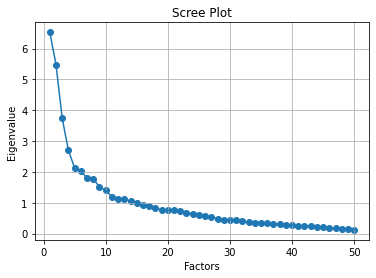

In [69]:
plt.scatter(range(1,fd_fa.shape[1]+1),ev)
plt.plot(range(1,fd_fa.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [70]:
fa = FactorAnalyzer(is_corr_matrix=False,rotation='varimax', n_factors=10)

fa.fit(fd_fa)


FactorAnalyzer(n_factors=10, rotation='varimax', rotation_kwargs={})

In [71]:
df=fa.fit_transform(fd_fa)

In [72]:
from factor_analyzer import FactorAnalyzer
n1=FactorAnalyzer()

In [73]:
final_df=pd.DataFrame(fa.loadings_,index=fd_fa.columns)
final_df.head()

0         1         2         3         4         5  \
Age            -0.068698  0.052539 -0.072131  0.702905 -0.021251 -0.087878   
Gender          0.037479 -0.027982 -0.197268  0.007542  0.105785 -0.056167   
Marital Status -0.092265  0.060106  0.018071  0.645563  0.050809 -0.054576   
Occupation      0.146948  0.088688  0.125567 -0.860458 -0.078258  0.020982   
Monthly Income -0.115295 -0.101619 -0.068426  0.739438  0.047291 -0.026645   

                       6         7         8         9  
Age             0.064015 -0.034693 -0.014144 -0.082439  
Gender         -0.003382  0.143146 -0.324373  0.216518  
Marital Status  0.032676  0.058632  0.119658 -0.182847  
Occupation      0.013181 -0.093409  0.033473 -0.118168  
Monthly Income -0.031378  0.126113 -0.018109  0.177373

In [74]:
fa.get_communalities

<bound method FactorAnalyzer.get_communalities of FactorAnalyzer(n_factors=10, rotation='varimax', rotation_kwargs={})>

In [75]:
csv_factor=final_df.style.apply(lambda x: ["background: red" if v>0.45 else "" for v in x], axis = 1)


In [76]:
csv_factor

In [77]:
df=pd.DataFrame(df)

## implement  ml algorithms on this factor analysis

In [78]:
## implement  ml algorithms on this factor analysis
df['Output']=fd_fa_ori['Output'].replace({"Yes":1,"No":0})

In [79]:
df.head()

0         1         2         3         4         5         6  \
0 -0.864479 -0.015585 -1.079664 -1.145159 -0.669729  0.765353  0.720680   
1  1.081667  1.834264  0.282811 -0.445670  1.326398  1.162493  1.110301   
2  0.145468  0.349805  0.003554 -1.009689  0.687563  1.285425  0.219584   
3  0.548542  0.666913  0.868319 -0.882121  0.154943 -1.053369  0.507920   
4 -0.018176  1.498977  0.476973 -0.937875 -0.395163 -0.877083  1.169811   

          7         8         9  Output  
0 -0.582955 -0.771793 -1.867677       1  
1 -0.762805 -0.301090 -0.577122       1  
2 -0.128879 -0.516513 -0.015622       1  
3  0.063418  0.340301 -0.883782       1  
4  0.430903 -0.839623  0.860128       1

In [80]:
df['Output'].value_counts()

1    301
0     87
Name: Output, dtype: int64

In [81]:
from imblearn.over_sampling import RandomOverSampler
X=df.iloc[:,0:10]
y=df.iloc[:,10]
nm=RandomOverSampler() # try to making data balanced 
X,y=nm.fit_sample(X,y)

## Dendogram(Optional)

In [82]:
# import numpy as np

# from matplotlib import pyplot as plt
# from scipy.cluster.hierarchy import dendrogram
# from sklearn.datasets import load_iris
# from sklearn.cluster import AgglomerativeClustering

# def plot_dendrogram(model, **kwargs):
#     # Create linkage matrix and then plot the dendrogram

#     # create the counts of samples under each node
#     counts = np.zeros(model.children_.shape[0])
#     n_samples = len(model.labels_)
#     for i, merge in enumerate(model.children_):
#         current_count = 0
#         for child_idx in merge:
#             if child_idx < n_samples:
#                 current_count += 1  # leaf node
#             else:
#                 current_count += counts[child_idx - n_samples]
#         counts[i] = current_count

#     linkage_matrix = np.column_stack([model.children_, model.distances_,
#                                       counts]).astype(float)

#     # Plot the corresponding dendrogram
#     dendrogram(linkage_matrix, **kwargs)

In [83]:
# from sklearn.cluster import AgglomerativeClustering
# model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
# model = model.fit(fd_fa)
# plt.title('Hierarchical Clustering Dendrogram')
# # plot the top three levels of the dendrogram
# plot_dendrogram(model, truncate_mode='level', p=3)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.show()

In [84]:
fd_fa.shape

(388, 50)

In [85]:
x=0
for i,j in zip(fd_fa.iloc[4,:],fd_fa.iloc[9,:]):
        if(i==j):
            x+=1
print(x)
            


21


## Ml Algo

### RandomForestClassifier

In [86]:

from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y)


clf=RandomForestClassifier(max_depth=5,oob_score = True)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9470198675496688

In [87]:
y_pre=clf.predict(X_test)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        78
           1       0.92      0.97      0.95        73

    accuracy                           0.95       151
   macro avg       0.95      0.95      0.95       151
weighted avg       0.95      0.95      0.95       151



In [88]:
from sklearn import metrics
pred_train = np.argmax(clf.oob_decision_function_,axis=1)
metrics.roc_auc_score(y_train, pred_train)

0.9468275509401306

In [89]:
from sklearn.model_selection import StratifiedKFold 
def validation(clf,X,y):
    lst_accu_stratified = [] 
    x=0
    skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
    for train_index, test_index in skf.split(X, y): 
        x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
        y_train_fold, y_test_fold = y[train_index], y[test_index] 
        clf.fit(x_train_fold, y_train_fold)
        y_pre=clf.predict(X_test)
        print(classification_report(y_test,y_pre))
        lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))



    print('List of possible accuracy:', lst_accu_stratified) 
    print('\nMaximum Accuracy That can be obtained from this model is:', 
          max(lst_accu_stratified)*100, '%') 
    print('\nMinimum Accuracy:', 
          min(lst_accu_stratified)*100, '%') 
    print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
    print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
    print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 
    
    return None

In [90]:
# from sklearn.model_selection import GridSearchCV
# clf=RandomForestClassifier()
# parameter=({"n_estimators":[10,20,25,30,40],
#             "criterion":["gini","entropy"],"max_depth":[1,2,4],
#            "min_samples_split":[1,2,4,8,10],"min_samples_leaf":[2,4,8,10,12],
#             "max_features":["auto", "sqrt", "log2"]})
           
# grid_clf_f = GridSearchCV(estimator=clf, param_grid=parameter,
#                                 scoring='f1', cv = 5, verbose=2, 
#                                 n_jobs=-1, return_train_score=True)

# grid_clf_f.fit(X_train, y_train)
# print(grid_clf_f.best_params_)

In [120]:
clf_f=RandomForestClassifier(criterion='gini', max_depth= 4,
                             max_features= 'log2', min_samples_leaf=2, 
                             min_samples_split=4, n_estimators=25)
clf_f.fit(X_train, y_train)
clf_f.score(X_test,y_test)
validation(clf_f,X,y)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        78
           1       0.95      0.95      0.95        73

    accuracy                           0.95       151
   macro avg       0.95      0.95      0.95       151
weighted avg       0.95      0.95      0.95       151

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        78
           1       0.94      0.99      0.96        73

    accuracy                           0.96       151
   macro avg       0.96      0.96      0.96       151
weighted avg       0.96      0.96      0.96       151

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        78
           1       0.90      0.99      0.94        73

    accuracy                           0.94       151
   macro avg       0.94      0.94      0.94       151
weighted avg       0.94      0.94      0.94       151

              preci

### Svm

In [92]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9271523178807947

In [93]:
y_pre=clf.predict(X_test)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        78
           1       0.92      0.93      0.93        73

    accuracy                           0.93       151
   macro avg       0.93      0.93      0.93       151
weighted avg       0.93      0.93      0.93       151



In [94]:
from sklearn.model_selection import StratifiedKFold 
validation(clf,X,y)


              precision    recall  f1-score   support

           0       0.95      0.96      0.96        78
           1       0.96      0.95      0.95        73

    accuracy                           0.95       151
   macro avg       0.95      0.95      0.95       151
weighted avg       0.95      0.95      0.95       151

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        78
           1       0.96      0.96      0.96        73

    accuracy                           0.96       151
   macro avg       0.96      0.96      0.96       151
weighted avg       0.96      0.96      0.96       151

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        78
           1       0.96      0.95      0.95        73

    accuracy                           0.95       151
   macro avg       0.95      0.95      0.95       151
weighted avg       0.95      0.95      0.95       151

              preci

###  Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.9536423841059603

In [96]:
y_pre=clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        78
           1       1.00      0.90      0.95        73

    accuracy                           0.95       151
   macro avg       0.96      0.95      0.95       151
weighted avg       0.96      0.95      0.95       151



In [97]:
from sklearn.model_selection import GridSearchCV
clf=DecisionTreeClassifier()
parameter=({"criterion":["gini","entropy"],"splitter":["best", "random"],"max_depth":[1,2,4],
           "min_samples_split":[1,2,4,8,10],"min_samples_leaf":[2,4,8,10,12],
            "max_features":["auto", "sqrt", "log2"]})
           
grid_clf_f = GridSearchCV(estimator=clf, param_grid=parameter,
                                scoring='f1', cv = 5, verbose=2, 
                                n_jobs=-1, return_train_score=True)
grid_clf_f.fit(X_train, y_train)
print(grid_clf_f.best_params_)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 984 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 2608 tasks      | elapsed:   19.9s


{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 8, 'splitter': 'best'}


[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:   32.9s finished


In [98]:
clf_f=DecisionTreeClassifier(criterion='gini', max_depth= 4,
                             max_features= 'sqrt', min_samples_leaf=4, 
                             min_samples_split=4, splitter='best')
clf_f.fit(X_train, y_train)
clf_f.score(X_test,y_test)
validation(clf_f,X,y)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        78
           1       0.91      0.81      0.86        73

    accuracy                           0.87       151
   macro avg       0.87      0.87      0.87       151
weighted avg       0.87      0.87      0.87       151

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        78
           1       0.75      0.82      0.78        73

    accuracy                           0.78       151
   macro avg       0.78      0.78      0.78       151
weighted avg       0.78      0.78      0.78       151

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        78
           1       0.92      0.82      0.87        73

    accuracy                           0.88       151
   macro avg       0.89      0.88      0.88       151
weighted avg       0.88      0.88      0.88       151

              preci

## MCA

In [99]:
fd_fa=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

In [100]:
basic_f0=['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Self Cooking',
 'Health Concern',
 'Late Delivery',
 'Unaffordable',
 'Maximum wait time','Output']

In [101]:
basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Self Cooking',
 'Health Concern',
 'Late Delivery',
 'Unaffordable',
 'Maximum wait time',
 'Output']

In [102]:
fd_fa=fd_fa[basic_f0]

In [103]:
one_hot = pd.get_dummies(fd_fa)
    
one_hot    

Age  Ease and convenient_Agree  Ease and convenient_Disagree  \
0     20                          0                             0   
1     24                          0                             0   
2     22                          0                             0   
3     22                          1                             0   
4     22                          1                             0   
..   ...                        ...                           ...   
383   23                          1                             0   
384   23                          0                             0   
385   22                          1                             0   
386   23                          0                             0   
387   23                          1                             0   

     Ease and convenient_Neutral  Ease and convenient_Strongly agree  \
0                              1                                   0   
1                              0                                   1   
2                              0                                   1   
3                              0                                   0   
4                              0                                   0   
..                           ...                                 ...   
383                            0                                   0   
384                            1                                   0   
385                            0                                   0   
386                            0                                   1   
387                            0                                   0   

     Ease and convenient_Strongly disagree  Time saving_Agree  \
0                                        0                  0   
1                                        0                  0   
2                                        0                  0   
3                                        0                  1   
4                                        0                  1   
..                                     ...                ...   
383                                      0                  1   
384                                      0                  0   
385                                      0                  1   
386                                      0                  0   
387                                      0                  0   

     Time saving_Disagree  Time saving_Neutral  Time saving_Strongly agree  \
0                       0                    1                           0   
1                       0                    0                           1   
2                       0                    0                           1   
3                       0                    0                           0   
4                       0                    0                           0   
..                    ...                  ...                         ...   
383                     0                    0                           0   
384                     0                    1                           0   
385                     0                    0                           0   
386                     0                    0                           1   
387                     0                    1                           0   

     ...  Unaffordable_Neutral  Unaffordable_Strongly agree  \
0    ...                     1                            0   
1    ...                     0                            1   
2    ...                     0                            0   
3    ...                     1                            0   
4    ...                     0                            0   
..   ...                   ...                          ...   
383  ...                     0                            0   
384  ...                     1                            0   
385  ...                  

In [104]:
n_new_columns = one_hot.shape[1]
n_initial_columns = X.shape[1]
total_inertia_ = (n_new_columns - n_initial_columns) / n_initial_columns

In [105]:
total_inertia_ 

5.3

In [106]:
import prince
mca = prince.MCA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
mca = mca.fit(fd_fa)

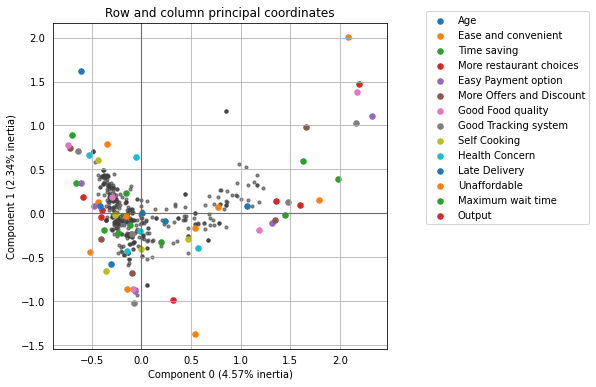

In [107]:
ax = mca.plot_coordinates(
    X=fd_fa,
    ax=None,
    figsize=(6, 6),
#     color_labels=['Output'.format(t) for t in X['Output']],
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1)

ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.get_figure().savefig('mca_coordinates.svg')

In [108]:
# famd.plot_row_coordinates(
#     fd_fa,
#    ax=None,
#     figsize=(6, 6),
#     x_component=0,
#     y_component=1,
# #     labels=fd_fa.index,
#     color_labels=['Output {}'.format(t) for t in fd_fa['Output']],
#     ellipse_outline=False,
#     ellipse_fill=True,
#    show_points=True
# )
# ax.get_figure().savefig('famd_row_coordinates.svg')

In [109]:
mca.explained_inertia_

[0.045712006591719236, 0.023375638799245237]

In [110]:
ev, v = mca.eigenvalues_
ev

0.15999202307101731

In [111]:
mca.total_inertia_

3.5

## T-SNE


In [112]:
from sklearn.manifold import TSNE
fd_fa_t.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Medium (P1)',
       'Medium (P2)', 'Meal(P1)', 'Meal(P2)', 'Perference(P1)',
       'Perference(P2)', 'Ease and convenient', 'Time saving',
       'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of rating', 'Less Delivery time',
      

In [113]:
X_embedded = TSNE(n_components=2).fit_transform(fd_fa_t)
X_embedded.shape

(388, 2)

In [114]:
t_sne_df=pd.DataFrame(data=X_embedded,columns=[1,2])

In [115]:
t_sne_df['Output']=fd_fa_ori['Output']
t_sne_df['Output']=t_sne_df['Output'].replace({"Yes":1,"No":0})


In [116]:
t_sne_df

1          2  Output
0    -9.405906  -7.796465       1
1   -15.985193 -19.295982       1
2   -18.867977 -14.034056       1
3    -3.006995 -17.180414       1
4    -7.374809 -19.460281       1
..         ...        ...     ...
383 -10.138879 -12.923286       1
384 -11.260406  -8.877591       1
385 -14.799101 -17.489027       1
386 -17.777102 -20.630865       1
387   5.598505 -17.008814       1

[388 rows x 3 columns]

<AxesSubplot:xlabel='1', ylabel='2'>

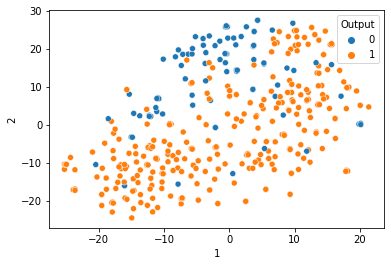

In [117]:
sns.scatterplot(data=t_sne_df,x=1,y=2,hue='Output')

## CFA(it's just practice)

In [118]:
# it's just practice
# from factor_analyzer import confirmatory_factor_analyzer
# caf=confirmatory_factor_analyzer.ConfirmatoryFactorAnalyzer()
# caf.fit(fd_fa, 9)

In [119]:
# c_df=pd.DataFrame(caf.loadings_,)
# c_df.head()